In [1]:
# Import Packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:
# Read in csv files and plot top of training data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(20)

,Id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,1000,60,within an hour,0.67,0.00,f,2,t,-33.919223,151.251815,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
1,1001,243,within an hour,0.99,0.97,f,260,f,-33.851283,151.282158,...,9.0,10.0,9.0,10.0,9.0,t,strict_14_with_grace_period,f,f,0.63
2,1002,210,within a day,0.86,0.67,f,1,t,-33.893217,151.266498,...,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,f,f,NaN
3,1003,111,within an hour,1.00,0.95,f,1,t,-34.042636,151.110000,...,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1.15
4,1004,160,within an hour,1.00,1.00,t,1,t,-33.910701,151.178311,...,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2.58
5,1005,100,NaN,NaN,NaN,f,1,f,-33.669088,151.316813,...,NaN,NaN,NaN,NaN,NaN,t,flexible,f,f,NaN
6,1006,141,NaN,NaN,1.00,f,2,t,-33.899364,151.182364,...,10.0,10.0,9.0,10.0,10.0,f,strict_14_with_grace_period,f,f,0.27
7,1007,110,NaN,NaN,NaN,f,4,t,-33.932613,151.147509,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
8,1008,150,within an hour,1.00,1.00,f,5,f,-33.877043,151.102999,...,9.0,9.0,10.0,10.0,9.0,t,moderate,f,f,1.16
9,1009,57,within a few hours,1.00,NaN,f,1,f,-33.800100,151.177634,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN


In [3]:
# Get dimensions of the data
dim_train = np.shape(train)
print("Training data dimensions", dim_train)

# Note we have one less dimension in testing data as there is no response variable
dim_test = np.shape(test)
print("Testing data dimensions", dim_test) 

Training data dimensions (1000, 36)
Testing data dimensions (1000, 35)


# combine 2 dataset for convience

In [4]:
# combine 2 dataset for convience

train_without_price = train.drop(["price"],axis=1)
combine=pd.concat([train_without_price,test], axis=0)
combine = combine.reset_index()

In [5]:
combine.shape

(2000, 36)

## add postcode here as we delete 2 lines for convience

In [6]:
location = ['latitude', 'longitude'] 
locat = combine[location]
latitude_max = locat.latitude.max()
latitude_min = locat.latitude.min()

longitude_max = locat.longitude.max()
longitude_min = locat.longitude.min()

lati_interval = 10
longi_interval = 7

lati_width = (latitude_max - latitude_min) / lati_interval + 0.00001
longi_width = (longitude_max - longitude_min) / longi_interval + 0.00001
locat_array = locat.values
postcode = []

for latitude, longitude in locat_array:
    row = int((longitude - longitude_min) / longi_width)
    col = int((latitude - latitude_min) / lati_width)
    index = row * longi_interval + col
    assert 0 <= index < 70
    postcode.append(index)
    
locat['postcode'] = postcode
combine['postcode'] = locat['postcode']
combine.shape

(2000, 37)

In [7]:
combine.shape

(2000, 37)

In [8]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
index                               2000 non-null int64
Id                                  2000 non-null int64
host_response_time                  1066 non-null object
host_response_rate                  1066 non-null float64
host_acceptance_rate                1283 non-null float64
host_is_superhost                   1999 non-null object
host_listings_count                 1999 non-null float64
host_identity_verified              1999 non-null object
latitude                            2000 non-null float64
longitude                           2000 non-null float64
property_type                       2000 non-null object
room_type                           2000 non-null object
accommodates                        2000 non-null int64
bathrooms                           1999 non-null float64
bedrooms                            1995 non-null float64
beds                              

In [9]:
combine.isna().sum()

index                                 0
Id                                    0
host_response_time                  934
host_response_rate                  934
host_acceptance_rate                717
host_is_superhost                     1
host_listings_count                   1
host_identity_verified                1
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             1
bedrooms                              5
beds                                 12
bed_type                              0
security_deposit                    736
cleaning_fee                        527
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                492


In [10]:
combine.columns.tolist()

['index',
 'Id',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'reviews_per_month',
 'postcode']

In [11]:
host_performance_var=['Id','host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified']

location_var=['Id','latitude',
 'longitude','postcode']

rooms_var=['Id','property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
'instant_bookable',
 'cancellation_policy',]

requirement_from_host_var=['Id','security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

reviews_var=['Id','number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value','reviews_per_month']



# handleing the missing values of host performance

In [12]:
#host performance的missing values
#host_response_time                  934
#host_response_rate                  934
#host_acceptance_rate                717

## host_response_time


In [13]:
#host_response_time
pd.crosstab(index = combine["host_response_time"], columns="count")

col_0,count
host_response_time,
a few days or more,41
within a day,116
within a few hours,170
within an hour,739


In [14]:
combine["host_response_time"].fillna('No Infor', inplace=True)

In [15]:
combine["host_response_time"].isna().sum()

0

In [16]:
pd.crosstab(index = combine["host_response_time"], columns="count")

col_0,count
host_response_time,
No Infor,934
a few days or more,41
within a day,116
within a few hours,170
within an hour,739


In [17]:
#plt.hist(combine["host_response_time"])
#plt.figure(figsize=(16,9))

## response rate

In [18]:
combine["host_response_rate"].describe()

count    1066.000000
mean        0.937946
std         0.190894
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: host_response_rate, dtype: float64

In [19]:
combine["host_response_rate"].median()
#no much difference in mean,median; median is less infulenced by the extremum

1.0

<Figure size 1152x648 with 0 Axes>

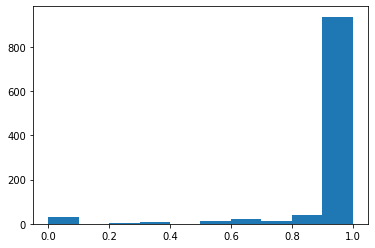

<Figure size 1152x648 with 0 Axes>

In [20]:
plt.hist(combine["host_response_rate"])
plt.figure(figsize=(16,9))

In [21]:
pd.crosstab(index = combine["host_response_rate"], columns="count")

col_0,count
host_response_rate,
0.00,30
0.17,1
0.20,1
0.25,1
0.33,6
0.38,1
0.43,1
0.50,11
0.56,1


In [22]:
combine["host_response_rate"].fillna(combine["host_response_rate"].median(), inplace=True)

In [23]:
combine["host_response_rate"].isna().sum()

0

In [24]:
pd.crosstab(index = combine["host_response_rate"], columns="count")

col_0,count
host_response_rate,
0.00,30
0.17,1
0.20,1
0.25,1
0.33,6
0.38,1
0.43,1
0.50,11
0.56,1


## host_acceptance_rate

In [25]:
pd.crosstab(index = combine["host_acceptance_rate"], columns="count")

col_0,count
host_acceptance_rate,
0.00,81
0.08,1
0.10,1
0.13,1
0.14,1
...,...
0.96,36
0.97,51
0.98,46


In [26]:
combine["host_acceptance_rate"].describe()

count    1283.000000
mean        0.827007
std         0.280856
min         0.000000
25%         0.770000
50%         0.970000
75%         1.000000
max         1.000000
Name: host_acceptance_rate, dtype: float64

In [27]:
combine["host_acceptance_rate"].median()

0.97

<Figure size 1152x648 with 0 Axes>

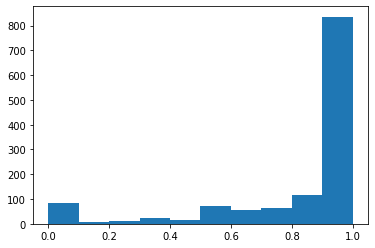

<Figure size 1152x648 with 0 Axes>

In [28]:
plt.hist(combine["host_acceptance_rate"])
plt.figure(figsize=(16,9))

In [29]:
combine["host_acceptance_rate"].fillna(combine["host_acceptance_rate"].median(), inplace=True)
combine["host_acceptance_rate"].isna().sum()

0

<Figure size 1152x648 with 0 Axes>

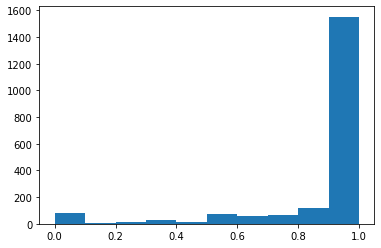

<Figure size 1152x648 with 0 Axes>

In [30]:
plt.hist(combine["host_acceptance_rate"])
plt.figure(figsize=(16,9))

In [31]:
combine[host_performance_var].isna().sum()

Id                        0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         1
host_listings_count       1
host_identity_verified    1
dtype: int64

In [32]:
print(combine["host_is_superhost"])
combine["host_is_superhost"].isna().sum()

0       f
1       f
2       f
3       f
4       t
       ..
1995    f
1996    f
1997    t
1998    f
1999    t
Name: host_is_superhost, Length: 2000, dtype: object


1

In [33]:
superhost= combine.loc[combine["host_is_superhost"]=="t"]
superhost.head(20)

,index,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,postcode
4,4,1004,within an hour,1.00,1.00,t,1.0,t,-33.910701,151.178311,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2.58,31
11,11,1011,within an hour,0.98,1.00,t,21.0,f,-33.869289,151.204307,...,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,5.74,39
15,15,1015,within an hour,1.00,0.75,t,5.0,f,-33.922077,151.190963,...,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN,38
29,29,1029,within an hour,1.00,0.96,t,2.0,t,-33.893424,151.172075,...,10.0,10.0,10.0,10.0,f,moderate,f,f,3.52,31
30,30,1030,within an hour,1.00,0.93,t,2.0,t,-33.881837,151.183260,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1.18,38
42,42,1042,within a few hours,1.00,1.00,t,1.0,f,-34.007365,151.067654,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1.89,22
49,49,1049,within an hour,1.00,0.98,t,1.0,f,-33.633380,151.335977,...,10.0,10.0,10.0,10.0,t,moderate,f,f,3.61,51
53,53,1053,within an hour,1.00,0.96,t,2.0,f,-33.945824,150.995981,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,0.52,16
69,69,1069,within an hour,1.00,0.95,t,1.0,t,-33.610876,151.327319,...,10.0,10.0,10.0,9.0,t,strict_14_with_grace_period,f,f,2.05,51
80,80,1080,within an hour,1.00,1.00,t,1.0,f,-33.619089,151.316516,...,10.0,10.0,10.0,10.0,f,moderate,f,f,2.59,51


In [34]:
superhost.describe()

,index,Id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,postcode
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,314.000000,...,315.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,315.000000
mean,508.219048,1032.028571,0.990095,0.941587,7.612698,-33.831297,151.213088,3.193651,1.206349,1.270701,...,62.612698,96.575658,9.888158,9.720395,9.911184,9.930921,9.914474,9.667763,2.368980,38.895238
std,296.456095,577.429552,0.040964,0.103052,21.243114,0.100984,0.087472,1.944441,0.422637,0.770856,...,68.496519,4.865945,0.481326,0.517781,0.296303,0.361284,0.302772,0.617255,1.894284,8.723192
min,4.000000,6.000000,0.670000,0.290000,0.000000,-34.058708,150.791018,1.000000,1.000000,0.000000,...,0.000000,40.000000,4.000000,6.000000,8.000000,6.000000,8.000000,4.000000,0.030000,6.000000
25%,253.500000,522.000000,1.000000,0.930000,1.000000,-33.894129,151.179439,2.000000,1.000000,1.000000,...,13.000000,96.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.940000,37.000000
50%,494.000000,1053.000000,1.000000,0.980000,2.000000,-33.873266,151.213198,2.000000,1.000000,1.000000,...,38.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.885000,39.000000
75%,777.000000,1508.500000,1.000000,1.000000,4.000000,-33.789316,151.282313,4.000000,1.000000,2.000000,...,87.500000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.352500,46.000000
max,999.000000,1996.000000,1.000000,1.000000,124.000000,-33.600042,151.338854,14.000000,3.000000,4.000000,...,390.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.060000,51.000000


In [35]:
superhost.min()
#in test data, but all exceed the other superhost reviews' performance;

index                                             4
Id                                                6
host_response_time                         No Infor
host_response_rate                             0.67
host_acceptance_rate                           0.29
host_is_superhost                                 t
host_listings_count                               0
host_identity_verified                            f
latitude                                   -34.0587
longitude                                   150.791
property_type                             Apartment
room_type                           Entire home/apt
accommodates                                      1
bathrooms                                         1
bedrooms                                          0
beds                                              0
bed_type                                     Airbed
security_deposit                                  0
cleaning_fee                                      0
guests_inclu

In [36]:
combine["host_is_superhost"].fillna("t",inplace=True)
combine["host_identity_verified"].fillna("f",inplace=True)
combine["host_listings_count"].fillna(0,inplace=True)


In [37]:
combine[host_performance_var].isna().sum()

Id                        0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_listings_count       0
host_identity_verified    0
dtype: int64

## rooms -----missing values

In [38]:
combine[rooms_var].isna().sum()

Id                      0
property_type           0
room_type               0
accommodates            0
bathrooms               1
bedrooms                5
beds                   12
bed_type                0
instant_bookable        0
cancellation_policy     0
dtype: int64

## bathrooms

In [39]:
rooms_null=combine[pd.isnull(combine["beds"])][rooms_var]
rooms_null

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
255,1255,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,flexible
483,1483,Apartment,Private room,4,1.0,2.0,NaN,Real Bed,t,strict_14_with_grace_period
749,1749,Guest suite,Private room,4,1.0,0.0,NaN,Real Bed,t,strict_14_with_grace_period
942,1942,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,f,flexible
952,1952,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,moderate
1406,406,House,Shared room,1,NaN,1.0,NaN,Real Bed,f,flexible
1453,453,Apartment,Entire home/apt,2,1.0,0.0,NaN,Real Bed,t,flexible
1455,455,Serviced apartment,Entire home/apt,2,1.0,NaN,NaN,Real Bed,t,flexible
1648,648,Apartment,Private room,1,0.0,1.0,NaN,Real Bed,t,moderate
1696,696,Apartment,Private room,2,1.0,NaN,NaN,Real Bed,t,flexible


In [40]:
a=combine.query("room_type == 'Shared room'")[rooms_var]
b= a.query("accommodates == 1")
c=b.query("bedrooms == 1.0")
d=c.query("property_type == 'House'")
d.median()

Id              755.5
accommodates      1.0
bathrooms         2.0
bedrooms          1.0
beds              1.0
dtype: float64

In [41]:
combine["bathrooms"].fillna(2.0,inplace=True)

In [42]:
rooms_null=combine[pd.isnull(combine["beds"])][rooms_var]
rooms_null

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
255,1255,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,flexible
483,1483,Apartment,Private room,4,1.0,2.0,NaN,Real Bed,t,strict_14_with_grace_period
749,1749,Guest suite,Private room,4,1.0,0.0,NaN,Real Bed,t,strict_14_with_grace_period
942,1942,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,f,flexible
952,1952,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,moderate
1406,406,House,Shared room,1,2.0,1.0,NaN,Real Bed,f,flexible
1453,453,Apartment,Entire home/apt,2,1.0,0.0,NaN,Real Bed,t,flexible
1455,455,Serviced apartment,Entire home/apt,2,1.0,NaN,NaN,Real Bed,t,flexible
1648,648,Apartment,Private room,1,0.0,1.0,NaN,Real Bed,t,moderate
1696,696,Apartment,Private room,2,1.0,NaN,NaN,Real Bed,t,flexible


## bedrooms

In [43]:
a=combine.query("room_type == 'Entire home/apt'")[rooms_var]
b= a.query("accommodates == 2")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Serviced apartment'")
d.median()

Id              408.0
accommodates      2.0
bathrooms         1.0
bedrooms          1.0
beds              1.0
dtype: float64

In [44]:
a=combine.query("room_type == 'Private room'")[rooms_var]
b= a.query("accommodates == 2")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Apartment'")
d.median()

Id              954.0
accommodates      2.0
bathrooms         1.0
bedrooms          1.0
beds              1.0
dtype: float64

In [45]:
combine["bedrooms"].fillna(1.0,inplace=True)

In [46]:
rooms_null=combine[pd.isnull(combine["beds"])][rooms_var]
rooms_null

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
255,1255,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,flexible
483,1483,Apartment,Private room,4,1.0,2.0,NaN,Real Bed,t,strict_14_with_grace_period
749,1749,Guest suite,Private room,4,1.0,0.0,NaN,Real Bed,t,strict_14_with_grace_period
942,1942,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,f,flexible
952,1952,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,moderate
1406,406,House,Shared room,1,2.0,1.0,NaN,Real Bed,f,flexible
1453,453,Apartment,Entire home/apt,2,1.0,0.0,NaN,Real Bed,t,flexible
1455,455,Serviced apartment,Entire home/apt,2,1.0,1.0,NaN,Real Bed,t,flexible
1648,648,Apartment,Private room,1,0.0,1.0,NaN,Real Bed,t,moderate
1696,696,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,flexible


## beds

In [47]:
rooms_null.query("room_type == 'Private room'").sort_values("property_type")

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
255,1255,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,flexible
483,1483,Apartment,Private room,4,1.0,2.0,NaN,Real Bed,t,strict_14_with_grace_period
942,1942,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,f,flexible
952,1952,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,moderate
1648,648,Apartment,Private room,1,0.0,1.0,NaN,Real Bed,t,moderate
1696,696,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,flexible
749,1749,Guest suite,Private room,4,1.0,0.0,NaN,Real Bed,t,strict_14_with_grace_period
1865,865,House,Private room,1,1.0,1.0,NaN,Real Bed,t,moderate
1860,860,Serviced apartment,Private room,2,1.0,1.0,NaN,Real Bed,t,flexible


In [48]:
a=combine.query("room_type == 'Private room'")[rooms_var]
b= a.query("accommodates == 2")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Apartment'")
e=d.query("bedrooms == 1.0")
e.median()

Id              953.5
accommodates      2.0
bathrooms         1.0
bedrooms          1.0
beds              1.0
dtype: float64

In [49]:
list = [255,952,1696]
for i in list:
    combine.iloc[i,15]= 1.0

In [50]:
a=combine.query("room_type == 'Private room'")[rooms_var]
b= a.query("accommodates == 4")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Apartment'")
e=d.query("bedrooms == 2.0")
e


,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
483,1483,Apartment,Private room,4,1.0,2.0,NaN,Real Bed,t,strict_14_with_grace_period
1168,168,Apartment,Private room,4,1.0,2.0,2.0,Real Bed,f,flexible
1524,524,Apartment,Private room,4,1.0,2.0,3.0,Real Bed,t,flexible


In [51]:
combine.shape

(2000, 37)

In [52]:
a=combine.query("room_type == 'Private room'")[rooms_var]
b= a.query("accommodates == 1")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Apartment'")
e=d.query("bedrooms == 1.0")
e.median()

Id              988.5
accommodates      1.0
bathrooms         1.0
bedrooms          1.0
beds              1.0
dtype: float64

In [53]:
combine.iloc[942,15] = 1.0

In [54]:
a=combine.query("room_type == 'Private room'")[rooms_var]
b= a.query("accommodates == 1")
c=b.query("bathrooms == 0.0")
d=c.query("property_type == 'Apartment'")
e=d.query("bedrooms == 1.0")
e.median()

Id              919.5
accommodates      1.0
bathrooms         0.0
bedrooms          1.0
beds              1.0
dtype: float64

In [55]:
combine.iloc[1648,15] = 1.0

In [56]:
a=combine.query("room_type == 'Private room'")[rooms_var]
b= a.query("accommodates == 4")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Guest suite'")
e=d.query("bedrooms == 0.0")
e.median()

Id              1749.0
accommodates       4.0
bathrooms          1.0
bedrooms           0.0
beds               NaN
dtype: float64

In [57]:
combine.shape

(2000, 37)

In [58]:
a=combine.query("room_type == 'Private room'")[rooms_var]
b= a.query("accommodates == 1")
c=b.query("bathrooms == 2.0")
d=c.query("property_type == 'House'")
e=d.query("bedrooms == 1.0")
e.median()

Id              587.5
accommodates      1.0
bathrooms         2.0
bedrooms          1.0
beds              1.0
dtype: float64

In [59]:
combine.iloc[1865,15] = 1.0

In [60]:
a=combine.query("room_type == 'Private room'")[rooms_var]
b= a.query("accommodates == 2")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Serviced apartment'")
e=d.query("bedrooms == 1.0")
e.median()

Id              860.0
accommodates      2.0
bathrooms         1.0
bedrooms          1.0
beds              NaN
dtype: float64

In [61]:
#860 line in test data,cannot drop
combine.iloc[1860,15] = 1.0

In [62]:
combine.isna().sum()

index                                 0
Id                                    0
host_response_time                    0
host_response_rate                    0
host_acceptance_rate                  0
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  5
bed_type                              0
security_deposit                    736
cleaning_fee                        527
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                492


In [63]:
combine[pd.isnull(combine["beds"])][rooms_var]

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
483,1483,Apartment,Private room,4,1.0,2.0,NaN,Real Bed,t,strict_14_with_grace_period
749,1749,Guest suite,Private room,4,1.0,0.0,NaN,Real Bed,t,strict_14_with_grace_period
1406,406,House,Shared room,1,2.0,1.0,NaN,Real Bed,f,flexible
1453,453,Apartment,Entire home/apt,2,1.0,0.0,NaN,Real Bed,t,flexible
1455,455,Serviced apartment,Entire home/apt,2,1.0,1.0,NaN,Real Bed,t,flexible


In [64]:
rooms_null.query("room_type == 'Entire home/apt'").sort_values("property_type")

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
1453,453,Apartment,Entire home/apt,2,1.0,0.0,NaN,Real Bed,t,flexible
1455,455,Serviced apartment,Entire home/apt,2,1.0,1.0,NaN,Real Bed,t,flexible


In [65]:
a=combine.query("room_type == 'Entire home/apt'")[rooms_var]
b= a.query("accommodates == 2")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Apartment'")
e=d.query("bedrooms == 0.0")
e.median()

Id              1227.0
accommodates       2.0
bathrooms          1.0
bedrooms           0.0
beds               1.0
dtype: float64

In [66]:
combine.iloc[1453,15] = 1.0

In [67]:
a=combine.query("room_type == 'Entire home/apt'")[rooms_var]
b= a.query("accommodates == 2")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'Serviced apartment'")
e=d.query("bedrooms == 1.0")
e.median()

Id              408.0
accommodates      2.0
bathrooms         1.0
bedrooms          1.0
beds              1.0
dtype: float64

In [68]:
combine.iloc[1455,15] = 1.0

In [69]:
combine[pd.isnull(combine["beds"])][rooms_var]

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
483,1483,Apartment,Private room,4,1.0,2.0,NaN,Real Bed,t,strict_14_with_grace_period
749,1749,Guest suite,Private room,4,1.0,0.0,NaN,Real Bed,t,strict_14_with_grace_period
1406,406,House,Shared room,1,2.0,1.0,NaN,Real Bed,f,flexible


In [70]:
a=combine.query("room_type == 'Shared room'")[rooms_var]
b= a.query("accommodates == 1")
c=b.query("bathrooms == 1.0")
d=c.query("property_type == 'House'")
e=d.query("bedrooms == 1.0")
e.median()

Id              1128.5
accommodates       1.0
bathrooms          1.0
bedrooms           1.0
beds               1.0
dtype: float64

In [71]:
combine.iloc[1406,15] = 1.0

In [72]:
combine[pd.isnull(combine["beds"])][rooms_var]

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy
483,1483,Apartment,Private room,4,1.0,2.0,NaN,Real Bed,t,strict_14_with_grace_period
749,1749,Guest suite,Private room,4,1.0,0.0,NaN,Real Bed,t,strict_14_with_grace_period


In [73]:
#ID1749 train set, drop
combine = combine.drop(index=749,axis=0)
#1483 lines in train set，drop
combine = combine.drop(index=483,axis=0)
#860 in test set，cannot drop


In [74]:
combine[pd.isnull(combine["beds"])][rooms_var]

,Id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy


In [75]:
combine.isna().sum()

index                                 0
Id                                    0
host_response_time                    0
host_response_rate                    0
host_acceptance_rate                  0
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  0
bed_type                              0
security_deposit                    736
cleaning_fee                        527
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                491


## security &&cleaning

In [76]:
combine[pd.isnull(combine["security_deposit"])][requirement_from_host_var]

,Id,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,require_guest_profile_picture,require_guest_phone_verification
3,1003,NaN,80.0,1,0,1,10,f,f
5,1005,NaN,NaN,1,0,1,1125,f,f
6,1006,NaN,60.0,1,0,4,30,f,f
9,1009,NaN,NaN,1,0,90,1125,f,f
10,1010,NaN,30.0,1,0,1,14,f,f
...,...,...,...,...,...,...,...,...,...
1981,981,NaN,NaN,1,0,1,1125,f,f
1986,986,NaN,120.0,4,50,3,1125,f,f
1989,989,NaN,NaN,1,0,1,1125,f,f
1991,991,NaN,NaN,1,0,1,1125,f,f


In [77]:
combine["security_deposit"].fillna(195,inplace=True)
combine["cleaning_fee"].fillna(59,inplace=True)

In [78]:
combine.isna().sum()

index                                 0
Id                                    0
host_response_time                    0
host_response_rate                    0
host_acceptance_rate                  0
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  0
bed_type                              0
security_deposit                      0
cleaning_fee                          0
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                491


### reveiws

In [79]:
combine.isna().sum()[reviews_var]

Id                               0
number_of_reviews                0
review_scores_rating           491
review_scores_accuracy         494
review_scores_cleanliness      494
review_scores_checkin          494
review_scores_communication    493
review_scores_location         494
review_scores_value            494
reviews_per_month              439
dtype: int64

In [80]:
combine[pd.isnull(combine["reviews_per_month"])][reviews_var] #reveiws ===0

,Id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1007,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1009,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1981,981,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,982,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,988,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,989,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
combine["reviews_per_month"].fillna(0,inplace=True)

In [82]:
combine[pd.isnull(combine["reviews_per_month"])][combine['number_of_reviews'] != 0]

,index,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,postcode


In [83]:
combine[combine["reviews_per_month"] == 0][combine['number_of_reviews'] != 0]

,index,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,postcode


In [84]:
combine.isna().sum()[reviews_var]

Id                               0
number_of_reviews                0
review_scores_rating           491
review_scores_accuracy         494
review_scores_cleanliness      494
review_scores_checkin          494
review_scores_communication    493
review_scores_location         494
review_scores_value            494
reviews_per_month                0
dtype: int64

In [85]:
combine[reviews_var].head(20)

,Id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,1001,7,100.0,10.0,9.0,10.0,9.0,10.0,9.0,0.63
2,1002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,1003,42,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
4,1004,107,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.58
5,1005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
6,1006,4,95.0,10.0,10.0,10.0,9.0,10.0,10.0,0.27
7,1007,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
8,1008,6,90.0,9.0,9.0,9.0,10.0,10.0,9.0,1.16
9,1009,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [86]:
[reviews_var]

[['Id',
  'number_of_reviews',
  'review_scores_rating',
  'review_scores_accuracy',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_communication',
  'review_scores_location',
  'review_scores_value',
  'reviews_per_month']]

In [87]:
reviews_var_missing = ['review_scores_rating',
  'review_scores_accuracy',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_communication',
  'review_scores_location',
  'review_scores_value']

combine['review_scores_rating'] = combine['review_scores_rating']/10

combine['review_scores_rating'].describe()

count    1507.000000
mean        9.311480
std         1.044842
min         2.000000
25%         9.100000
50%         9.600000
75%        10.000000
max        10.000000
Name: review_scores_rating, dtype: float64

In [88]:
print(combine['review_scores_rating'].describe())
print("////////////////////")
print(combine['review_scores_accuracy'].describe())
print("////////////////////")
print(combine['review_scores_cleanliness'].describe())
print("////////////////////")
print(combine['review_scores_checkin'].describe())
print("////////////////////")
print(combine['review_scores_location'].describe())
print("////////////////////")
print(combine['review_scores_value'].describe())
print("////////////////////")


count    1507.000000
mean        9.311480
std         1.044842
min         2.000000
25%         9.100000
50%         9.600000
75%        10.000000
max        10.000000
Name: review_scores_rating, dtype: float64
////////////////////
count    1504.000000
mean        9.556516
std         1.019176
min         2.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: review_scores_accuracy, dtype: float64
////////////////////
count    1504.000000
mean        9.230718
std         1.229202
min         2.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: review_scores_cleanliness, dtype: float64
////////////////////
count    1504.000000
mean        9.719415
std         0.791502
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: review_scores_checkin, dtype: float64
////////////////////
count    1504.000000
mean        9.703457
std         0.786505
m

10.0    480
9.8      96
9.3      95
9.6      95
9.5      92
9.0      86
9.7      84
8.0      74
9.9      65
9.4      52
9.2      49
9.1      35
6.0      28
8.7      26
8.5      26
8.9      21
8.8      20
8.6      12
4.0      12
8.4       9
7.3       6
2.0       6
7.0       6
8.3       5
7.8       4
6.7       4
7.5       4
8.2       3
7.4       2
6.5       2
7.1       2
6.4       1
6.9       1
4.4       1
7.7       1
7.9       1
7.6       1
Name: review_scores_rating, dtype: int64

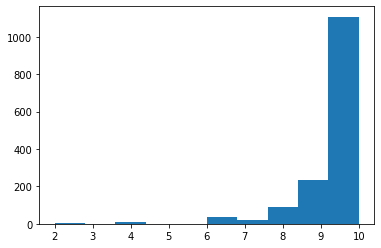

<Figure size 1152x648 with 0 Axes>

In [89]:
plt.hist(combine['review_scores_rating'])
plt.figure(figsize=(16,9))
combine['review_scores_rating'].value_counts()

10.0    1101
9.0      274
8.0       79
6.0       19
7.0       15
2.0        9
4.0        7
Name: review_scores_accuracy, dtype: int64

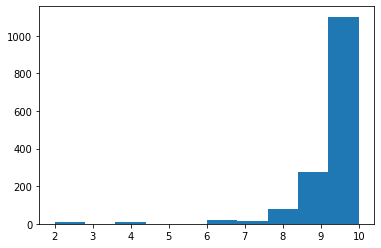

<Figure size 1152x648 with 0 Axes>

In [90]:
plt.hist(combine['review_scores_accuracy'])
plt.figure(figsize=(16,9))
combine['review_scores_accuracy'].value_counts()

10.0    831
9.0     422
8.0     151
7.0      38
6.0      36
2.0      12
4.0       9
5.0       5
Name: review_scores_cleanliness, dtype: int64

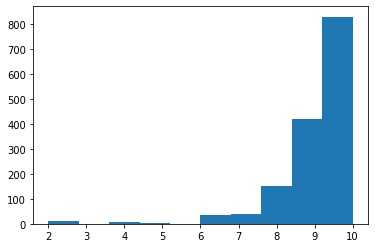

<Figure size 1152x648 with 0 Axes>

In [91]:
plt.hist(combine['review_scores_cleanliness'])
plt.figure(figsize=(16,9))
combine['review_scores_cleanliness'].value_counts()

10.0    1232
9.0      194
8.0       50
6.0       10
7.0        9
4.0        4
2.0        4
5.0        1
Name: review_scores_checkin, dtype: int64

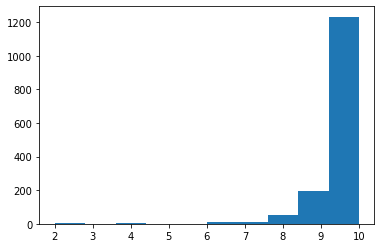

<Figure size 1152x648 with 0 Axes>

In [92]:
plt.hist(combine['review_scores_checkin'])
plt.figure(figsize=(16,9))
combine['review_scores_checkin'].value_counts()

10.0    1217
9.0      202
8.0       53
6.0       24
7.0        4
2.0        3
4.0        1
Name: review_scores_location, dtype: int64

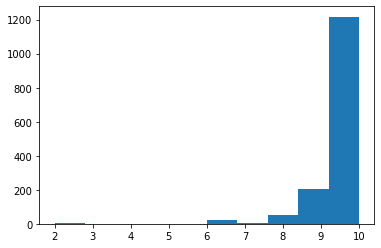

<Figure size 1152x648 with 0 Axes>

In [93]:
plt.hist(combine['review_scores_location'])
plt.figure(figsize=(16,9))
combine['review_scores_location'].value_counts()

10.0    811
9.0     508
8.0     125
6.0      22
7.0      16
2.0      10
4.0       8
5.0       4
Name: review_scores_value, dtype: int64

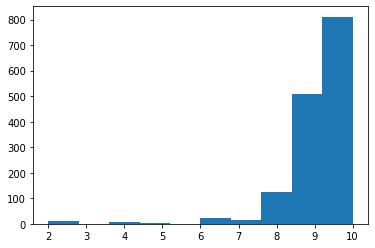

<Figure size 1152x648 with 0 Axes>

In [94]:
plt.hist(combine['review_scores_value'])
plt.figure(figsize=(16,9))
combine['review_scores_value'].value_counts()

In [95]:
combine.head(20)[reviews_var]

,Id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,1001,7,10.0,10.0,9.0,10.0,9.0,10.0,9.0,0.63
2,1002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,1003,42,9.8,10.0,10.0,10.0,10.0,10.0,10.0,1.15
4,1004,107,9.8,10.0,10.0,10.0,10.0,10.0,10.0,2.58
5,1005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
6,1006,4,9.5,10.0,10.0,10.0,9.0,10.0,10.0,0.27
7,1007,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
8,1008,6,9.0,9.0,9.0,9.0,10.0,10.0,9.0,1.16
9,1009,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [96]:
def level(val):
    if np.isnan(val):
        return"No_comments"
    if val < 6.0:
        return "Poor"
    if val < 9.3:
        return "Fair"
    elif val <9.6:
        return "Good"
    else:
        return "Excellent"
combine['review_scores_rating'] = combine['review_scores_rating'].apply(level)

In [97]:
def level(val):
    if np.isnan(val):
        return"No_comments"
    if val <= 7.0:
        return "Poor"
    if val <= 8.0:
        return "Fair"
    elif val <= 9.0:
        return "Good"
    else:
        return "Excellent"

In [98]:
reviews_without_rating=['review_scores_accuracy',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_communication',
  'review_scores_location',
  'review_scores_value']

for i in reviews_without_rating:
    combine[i] = combine[i].apply(level)

In [99]:
combine.isna().sum()

index                               0
Id                                  0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_score

In [100]:
combine.shape

(1998, 37)

In [101]:
#test data
combine.query("Id<=999").shape

(1000, 37)

In [102]:
train_clean= combine.query("Id > 999")
train_clean.shape

(998, 37)

In [103]:
test_clean=combine.query("Id <= 999")
test_clean.shape

(1000, 37)

In [104]:
test_clean.head()

,index,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,postcode
1000,0,0,No Infor,1.0,0.97,f,1.0,f,-34.011290,151.051900,...,No_comments,No_comments,No_comments,No_comments,f,flexible,f,f,0.00,22
1001,1,1,within an hour,1.0,0.98,f,1.0,f,-33.967536,151.106821,...,Excellent,Excellent,Excellent,Good,t,moderate,f,f,1.27,30
1002,2,2,No Infor,1.0,0.97,f,1.0,t,-33.887934,151.195959,...,No_comments,No_comments,No_comments,No_comments,t,flexible,f,f,0.00,38
1003,3,3,No Infor,1.0,0.97,f,1.0,f,-33.678141,151.308717,...,Excellent,Good,Good,Fair,f,moderate,f,f,0.07,50
1004,4,4,No Infor,1.0,0.97,f,1.0,t,-33.905495,151.219036,...,Fair,Fair,Excellent,Excellent,f,strict_14_with_grace_period,f,f,0.03,38


In [105]:
combine.head(20)

,index,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,postcode
0,0,1000,within an hour,0.67,0.00,f,2.0,t,-33.919223,151.251815,...,No_comments,No_comments,No_comments,No_comments,f,flexible,f,f,0.00,38
1,1,1001,within an hour,0.99,0.97,f,260.0,f,-33.851283,151.282158,...,Excellent,Good,Excellent,Good,t,strict_14_with_grace_period,f,f,0.63,46
2,2,1002,within a day,0.86,0.67,f,1.0,t,-33.893217,151.266498,...,No_comments,No_comments,No_comments,No_comments,f,strict_14_with_grace_period,f,f,0.00,45
3,3,1003,within an hour,1.00,0.95,f,1.0,t,-34.042636,151.110000,...,Excellent,Excellent,Excellent,Excellent,f,moderate,f,f,1.15,28
4,4,1004,within an hour,1.00,1.00,t,1.0,t,-33.910701,151.178311,...,Excellent,Excellent,Excellent,Excellent,f,strict_14_with_grace_period,f,f,2.58,31
5,5,1005,No Infor,1.00,0.97,f,1.0,f,-33.669088,151.316813,...,No_comments,No_comments,No_comments,No_comments,t,flexible,f,f,0.00,50
6,6,1006,No Infor,1.00,1.00,f,2.0,t,-33.899364,151.182364,...,Excellent,Good,Excellent,Excellent,f,strict_14_with_grace_period,f,f,0.27,38
7,7,1007,No Infor,1.00,0.97,f,4.0,t,-33.932613,151.147509,...,No_comments,No_comments,No_comments,No_comments,f,flexible,f,f,0.00,30
8,8,1008,within an hour,1.00,1.00,f,5.0,f,-33.877043,151.102999,...,Good,Excellent,Excellent,Good,t,moderate,f,f,1.16,32
9,9,1009,within a few hours,1.00,0.97,f,1.0,f,-33.800100,151.177634,...,No_comments,No_comments,No_comments,No_comments,f,flexible,f,f,0.00,33


# Feature engineering

In [106]:
train_fe= train_clean.copy()
test_fe=test_clean.copy()

In [107]:
train_fe["room_type"].value_counts()

Entire home/apt    637
Private room       332
Shared room         26
Hotel room           3
Name: room_type, dtype: int64

In [108]:
##decrease category
train_fe["property_type"].value_counts()

Apartment                647
House                    206
Guesthouse                31
Townhouse                 30
Guest suite               25
Condominium               23
Cottage                    6
Villa                      6
Loft                       5
Bed and breakfast          3
Cabin                      3
Bungalow                   3
Boutique hotel             2
Pension (South Korea)      1
Hostel                     1
Island                     1
Serviced apartment         1
Other                      1
Camper/RV                  1
Hotel                      1
Boat                       1
Name: property_type, dtype: int64

In [109]:
train_fe["bed_type"].value_counts()

Real Bed         992
Pull-out Sofa      4
Futon              1
Airbed             1
Name: bed_type, dtype: int64

In [110]:
train_fe["cancellation_policy"].value_counts()

strict_14_with_grace_period    406
flexible                       337
moderate                       254
super_strict_60                  1
Name: cancellation_policy, dtype: int64

In [111]:
train_fe[reviews_var].head(5)
train_fe["review_scores_cleanliness"].value_counts()

Excellent      406
No_comments    242
Good           225
Fair            74
Poor            51
Name: review_scores_cleanliness, dtype: int64

In [112]:
##decrease property_type category
train_fe['property_type'] = np.where(train_fe['property_type'].str.contains('House'), "House",
                            (np.where(train_fe['property_type'].str.contains('Guest suite'),"Guest suite",
                            (np.where(train_fe['property_type'].str.contains('Guesthouse'),"Guesthouse",
                            (np.where(train_fe['property_type'].str.contains('Condominium'), "Condominium",
                            (np.where(train_fe['property_type'].str.contains('Apartment'), "Apartment",
                            (np.where(train_fe['property_type'].str.contains('Townhouse'), "Townhouse",
                             "Other")))))))))))

##check
train_fe['property_type'].value_counts() 


Apartment      647
House          206
Other           36
Guesthouse      31
Townhouse       30
Guest suite     25
Condominium     23
Name: property_type, dtype: int64

In [113]:
### t&f----0/1 
train_fe["instant_bookable"] = train.instant_bookable.map({'f':0, 't':1})
train_fe["host_is_superhost"]= train.host_is_superhost.map({'f':0, 't':1})
train_fe["host_identity_verified"]= train.host_identity_verified.map({'f':0, 't':1})
train_fe["require_guest_profile_picture"]= train.require_guest_profile_picture.map({'f':0, 't':1})
train_fe["require_guest_phone_verification"]= train.require_guest_phone_verification.map({'f':0, 't':1})


#check
print(train_fe["instant_bookable"].value_counts())
print("******")
print(train_fe["host_is_superhost"].value_counts())
print("******")
print(train_fe["host_identity_verified"].value_counts())
print("******")
print(train_fe["require_guest_profile_picture"].value_counts())
print("******")
print(train_fe["require_guest_phone_verification"].value_counts())


0    584
1    414
Name: instant_bookable, dtype: int64
******
0    833
1    165
Name: host_is_superhost, dtype: int64
******
0    641
1    357
Name: host_identity_verified, dtype: int64
******
0    995
1      3
Name: require_guest_profile_picture, dtype: int64
******
0    994
1      4
Name: require_guest_phone_verification, dtype: int64


In [114]:
train_fe.isna().sum()

index                               0
Id                                  0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_score

In [115]:
train_fe["cancellation_policy"]= train_fe["cancellation_policy"].map({'strict_14_with_grace_period':0, 
                                                                      "flexible":4, "moderate":3,
                                                                      "super_strict_30":1, "super_strict_60":2})

In [116]:
train_fe.isna().sum()

index                               0
Id                                  0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_score

In [117]:
test_fe[pd.isnull(test_fe["cancellation_policy"])]

,index,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,postcode


In [118]:
train_fe.shape

(998, 37)

## get dummy

In [119]:
### dummy variable
train_fe_dm=pd.get_dummies(train_fe).copy()
train_fe_dm.head(20)
train_fe_dm.shape
train_fe_dm.columns.tolist()

['index',
 'Id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'reviews_per_month',
 'postcode',
 'host_response_time_No Infor',
 'host_response_time_a few days or more',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'property_type_Apartment',
 'property_type_Condominium',
 'property_type_Guest suite',
 'property_type_Guesthouse',
 'property_type_House',
 'property_type_Other',
 'property_type_Townhouse',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'bed

In [120]:
train_fe_dm.shape

(998, 81)

In [121]:
train_fe_dm.isna().sum()

index                              0
Id                                 0
host_response_rate                 0
host_acceptance_rate               0
host_is_superhost                  0
                                  ..
review_scores_value_Excellent      0
review_scores_value_Fair           0
review_scores_value_Good           0
review_scores_value_No_comments    0
review_scores_value_Poor           0
Length: 81, dtype: int64

In [122]:
test_fe.head(20)

,index,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,postcode
1000,0,0,No Infor,1.00,0.97,f,1.0,f,-34.011290,151.051900,...,No_comments,No_comments,No_comments,No_comments,f,flexible,f,f,0.00,22
1001,1,1,within an hour,1.00,0.98,f,1.0,f,-33.967536,151.106821,...,Excellent,Excellent,Excellent,Good,t,moderate,f,f,1.27,30
1002,2,2,No Infor,1.00,0.97,f,1.0,t,-33.887934,151.195959,...,No_comments,No_comments,No_comments,No_comments,t,flexible,f,f,0.00,38
1003,3,3,No Infor,1.00,0.97,f,1.0,f,-33.678141,151.308717,...,Excellent,Good,Good,Fair,f,moderate,f,f,0.07,50
1004,4,4,No Infor,1.00,0.97,f,1.0,t,-33.905495,151.219036,...,Fair,Fair,Excellent,Excellent,f,strict_14_with_grace_period,f,f,0.03,38
1005,5,5,No Infor,1.00,0.97,f,1.0,t,-33.781679,151.283297,...,No_comments,No_comments,No_comments,No_comments,f,strict_14_with_grace_period,f,f,0.00,47
1006,6,6,within an hour,1.00,1.00,t,1.0,f,-33.874674,151.205476,...,Excellent,Excellent,Excellent,Excellent,t,strict_14_with_grace_period,f,f,0.66,39
1007,7,7,within an hour,0.92,0.96,t,80.0,f,-33.882555,151.203174,...,Good,Good,Excellent,Good,t,flexible,f,f,4.23,38
1008,8,8,No Infor,1.00,0.00,f,2.0,t,-33.754329,150.924368,...,Excellent,Excellent,Good,Excellent,t,moderate,f,f,0.30,13
1009,9,9,No Infor,1.00,0.97,f,1.0,t,-33.929225,151.153463,...,Excellent,Excellent,Excellent,Good,t,moderate,f,f,0.23,30


In [123]:
###test set 

##decrease property_type category
test_fe['property_type'] = np.where(test_fe['property_type'].str.contains('House'), "House",
                            (np.where(test_fe['property_type'].str.contains('Guest suite'),"Guest suite",
                            (np.where(test_fe['property_type'].str.contains('Guesthouse'),"Guesthouse",
                            (np.where(test_fe['property_type'].str.contains('Condominium'), "Condominium",
                            (np.where(test_fe['property_type'].str.contains('Apartment'), "Apartment",
                            (np.where(test_fe['property_type'].str.contains('Townhouse'), "Townhouse",
                             "Other")))))))))))

##check
test_fe['property_type'].value_counts() 




Apartment      641
House          216
Other           54
Townhouse       31
Guesthouse      22
Guest suite     19
Condominium     17
Name: property_type, dtype: int64

In [124]:
test_fe.head()

,index,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,postcode
1000,0,0,No Infor,1.0,0.97,f,1.0,f,-34.011290,151.051900,...,No_comments,No_comments,No_comments,No_comments,f,flexible,f,f,0.00,22
1001,1,1,within an hour,1.0,0.98,f,1.0,f,-33.967536,151.106821,...,Excellent,Excellent,Excellent,Good,t,moderate,f,f,1.27,30
1002,2,2,No Infor,1.0,0.97,f,1.0,t,-33.887934,151.195959,...,No_comments,No_comments,No_comments,No_comments,t,flexible,f,f,0.00,38
1003,3,3,No Infor,1.0,0.97,f,1.0,f,-33.678141,151.308717,...,Excellent,Good,Good,Fair,f,moderate,f,f,0.07,50
1004,4,4,No Infor,1.0,0.97,f,1.0,t,-33.905495,151.219036,...,Fair,Fair,Excellent,Excellent,f,strict_14_with_grace_period,f,f,0.03,38


In [125]:
###t&f
for i in["instant_bookable","host_is_superhost","host_identity_verified",
         "require_guest_profile_picture","require_guest_phone_verification"]:
    test_fe[i] = test_fe[i].map({'f':0, 't':1})

In [126]:
test_fe.isna().sum()

index                               0
Id                                  0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_score

In [127]:
test_fe["cancellation_policy"]= test_fe["cancellation_policy"].map({'strict_14_with_grace_period':0, 
                                                                    "flexible":4, "moderate":3, 
                                                                    "super_strict_30":1, "super_strict_60":2})


In [128]:
test_fe.isna().sum()

index                               0
Id                                  0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_score

In [129]:
test_fe.shape

(1000, 37)

In [130]:
combine.isna().sum()

index                               0
Id                                  0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_score

## get dummy

In [131]:
### dummy variable
test_fe_dm=pd.get_dummies(test_fe).copy()
test_fe_dm.head(20)
test_fe_dm.shape

(1000, 81)

In [132]:
train_fe_dm.columns

Index(['index', 'Id', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'postcode', 'host_response_time_No Infor',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'property_type_Apartment',
       'property_type_Condominium', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_House',
       'property_type_Other', 'property_type_Townhouse',
       'room_type_Entire home/apt', 'room_type

## continuous variables&&& dummy_variables

In [133]:
## get continuous variables

conti=[]
dummy=[]

for x in train_fe_dm.columns[2:]:
    if train_fe_dm[x].value_counts().shape[0] > 2:
        conti.append(x)
    else:
        dummy.append(x)
        
print("conti_var:{0}".format(conti))

print("********")

print("dummy_var:{0}".format(dummy))

conti_var:['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'cancellation_policy', 'reviews_per_month', 'postcode']
********
dummy_var:['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_response_time_No Infor', 'host_response_time_a few days or more', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour', 'property_type_Apartment', 'property_type_Condominium', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_House', 'property_type_Other', 'property_type_Townhouse', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Fu

# statistical

In [134]:
sta=train_fe_dm.describe()
sta.loc["skew",:]=train_fe_dm.skew()
sta.loc['kurt',:]=train_fe_dm.kurt()
sta[conti].round(3)

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,cancellation_policy,reviews_per_month,postcode
count,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000,998.000
mean,0.960,0.869,6.487,-33.858,151.207,3.161,1.244,1.421,1.816,273.352,74.096,1.608,12.793,5.892,685.825,20.143,2.116,0.912,38.068
std,0.156,0.251,20.838,0.080,0.078,1.925,0.491,0.852,1.327,388.574,55.851,1.217,24.642,35.503,529.948,43.892,1.795,1.452,7.856
min,0.000,0.000,0.000,-34.069,150.816,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,1.000,0.910,1.000,-33.902,151.180,2.000,1.000,1.000,1.000,195.000,50.000,1.000,0.000,1.000,30.000,1.000,0.000,0.030,37.000
50%,1.000,0.970,1.000,-33.882,151.213,2.000,1.000,1.000,1.000,195.000,59.000,1.000,0.000,2.000,1125.000,4.000,3.000,0.235,38.000
75%,1.000,0.990,2.000,-33.826,151.262,4.000,1.375,2.000,2.000,300.000,90.000,2.000,20.000,4.000,1125.000,17.000,4.000,1.170,45.000
max,1.000,1.000,260.000,-33.590,151.338,14.000,5.000,5.000,13.000,7000.000,550.000,8.000,400.000,1000.000,1125.000,390.000,4.000,14.060,51.000
skew,-4.971,-2.497,6.926,1.234,-1.428,1.633,2.151,1.263,2.632,9.443,2.360,2.474,6.496,23.455,-0.398,4.082,-0.247,2.653,-0.945
kurt,25.675,5.316,61.613,1.784,3.445,3.713,6.249,2.316,11.711,133.922,10.661,6.554,80.881,629.283,-1.819,20.911,-1.790,10.615,2.047


In [135]:
train_fe_dm[conti]

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,cancellation_policy,reviews_per_month,postcode
0,0.67,0.00,2.0,-33.919223,151.251815,1,1.0,1.0,1.0,150.0,59.0,1,0,10,20,0,4,0.00,38
1,0.99,0.97,260.0,-33.851283,151.282158,11,2.0,5.0,4.0,1000.0,550.0,8,0,2,1125,7,0,0.63,46
2,0.86,0.67,1.0,-33.893217,151.266498,2,1.0,1.0,0.0,0.0,194.0,1,0,4,1125,0,0,0.00,45
3,1.00,0.95,1.0,-34.042636,151.110000,2,1.0,0.0,1.0,195.0,80.0,1,0,1,10,42,3,1.15,28
4,1.00,1.00,1.0,-33.910701,151.178311,3,1.0,1.0,2.0,400.0,80.0,2,25,2,1125,107,0,2.58,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.00,0.93,3.0,-33.903949,151.174800,1,1.0,1.0,0.0,150.0,35.0,1,0,8,1125,19,0,0.87,31
996,1.00,1.00,7.0,-33.963486,151.033801,2,2.0,1.0,1.0,250.0,45.0,1,10,1,364,6,0,0.74,23
997,1.00,0.00,2.0,-33.910786,151.255380,3,1.0,1.0,1.0,500.0,75.0,1,30,5,14,1,0,0.04,38
998,1.00,1.00,2.0,-33.915290,151.256351,2,1.0,0.0,1.0,195.0,79.0,1,0,3,45,76,3,1.48,38


##look continuous
from statlearning import plot_dists
fig, ax = plot_dists(train_fe_dm[conti])


##look dummy
from statlearning import plot_dists
fig, ax = plot_dists(train_fe_dm[dummy])

In [136]:
## because match train dataset , we drop 2 lines before, so here we need to do the same things
train_price_drop1= train["price"].drop(index=483,axis=0)
train_price_drop2= train_price_drop1.drop(index=749,axis=0)

In [137]:
train_price_drop2.head(750)

0       60
1      243
2      210
3      111
4      160
      ... 
746    200
747    113
748     95
750    194
751    210
Name: price, Length: 750, dtype: int64

In [138]:
train_price_drop2.shape

(998,)

## plot the graph

(<Figure size 864x1512 with 19 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c704350>,
       dtype=object))

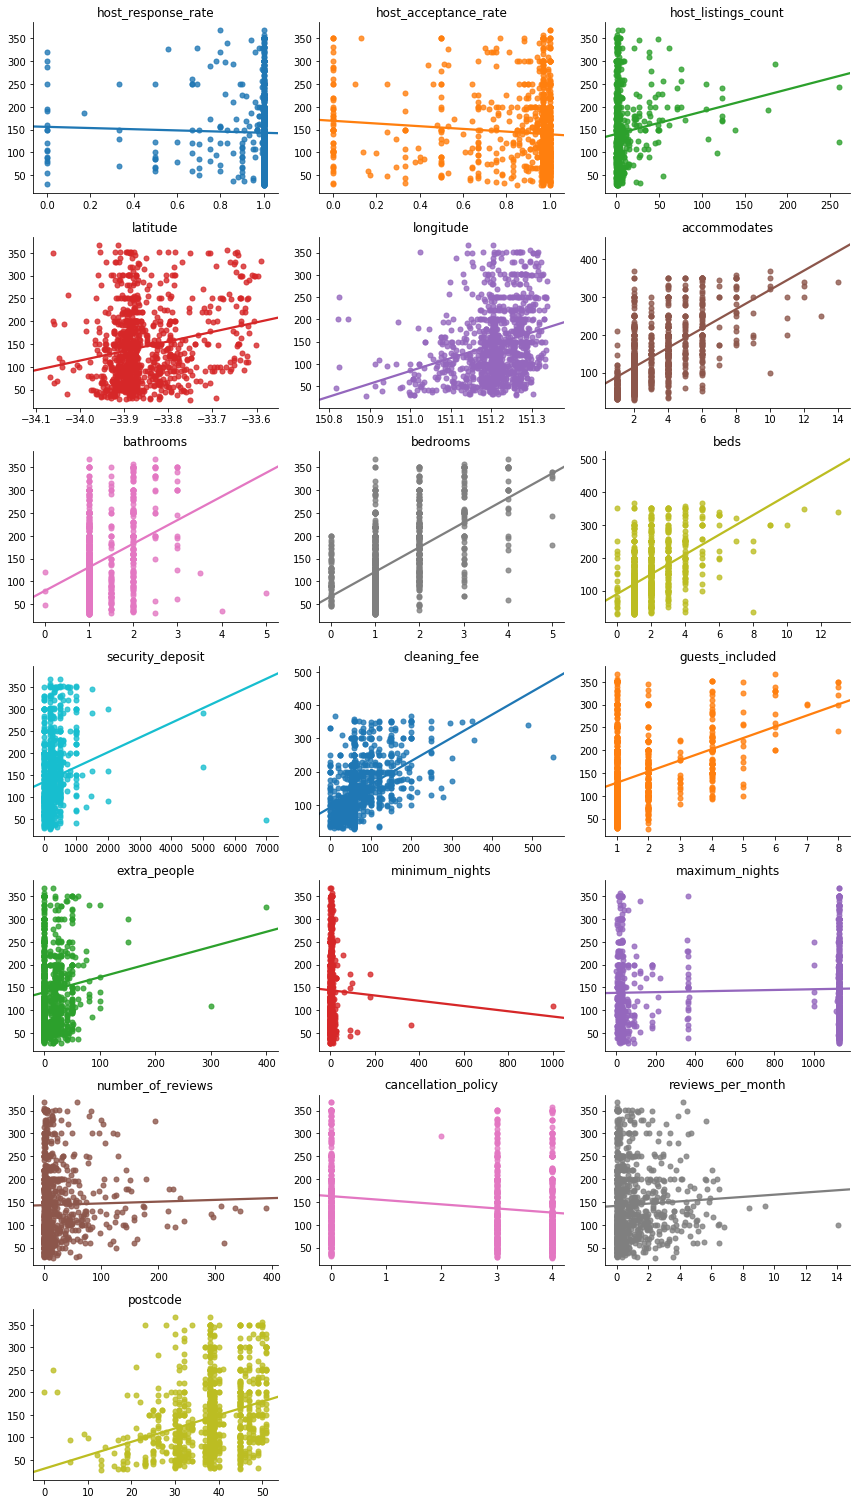

In [139]:
#continuous variable

from statlearning import plot_regressions

plot_regressions(train_fe_dm[conti],train_price_drop2)




In [161]:
selected=['host_listings_count','security_deposit']

In [162]:
selected2=['extra_people','minimum_nights']

(<Figure size 864x216 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c21730990>,
       dtype=object))

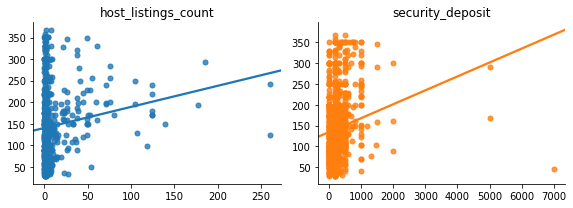

In [163]:
from statlearning import plot_regressions

plot_regressions(train_fe_dm[selected],train_price_drop2)


(<Figure size 864x216 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c219c65d0>,
       dtype=object))

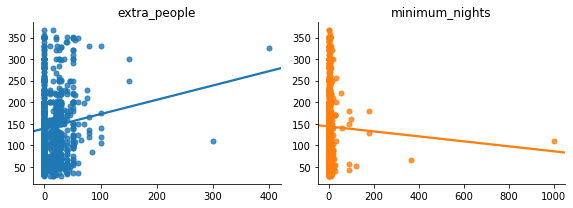

In [164]:
from statlearning import plot_regressions

plot_regressions(train_fe_dm[selected2],train_price_drop2)

(<Figure size 864x4320 with 60 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103a08f90>,
       dtype=object))

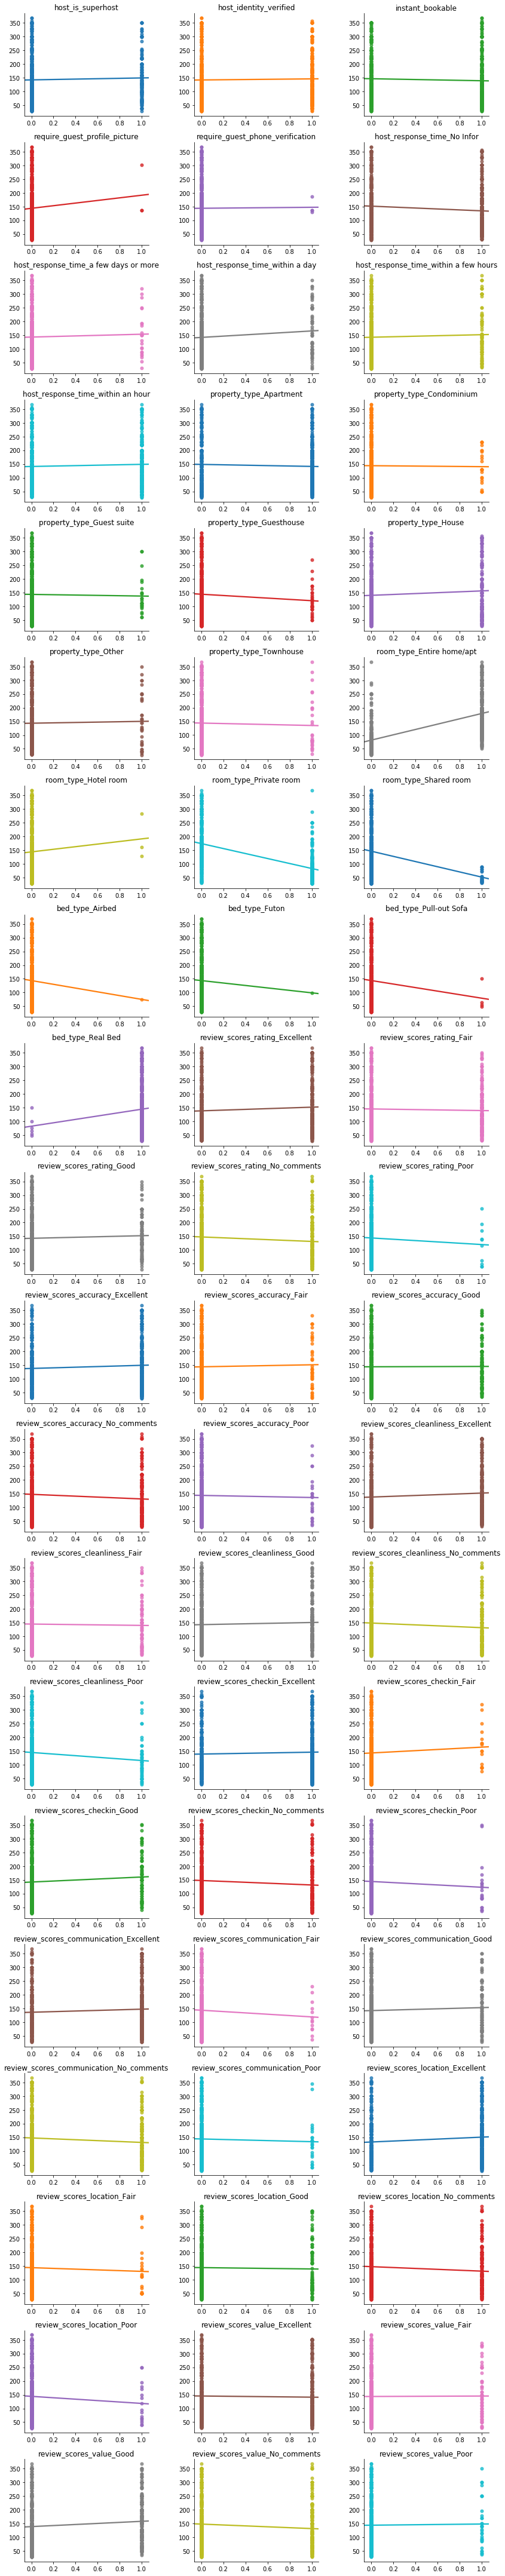

In [143]:
###dummy variable
from statlearning import plot_regressions

plot_regressions(train_fe_dm[dummy],train_price_drop2)



In [144]:
###train-fe——dm, add in drop2 lines price
train_withprice=train_fe_dm.copy()
train_withprice.loc[:,"price"]=train_price_drop2
train_withprice.head(500)

,index,Id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,...,review_scores_location_Fair,review_scores_location_Good,review_scores_location_No_comments,review_scores_location_Poor,review_scores_value_Excellent,review_scores_value_Fair,review_scores_value_Good,review_scores_value_No_comments,review_scores_value_Poor,price
0,0,1000,0.67,0.00,0,2.0,1,-33.919223,151.251815,1,...,0,0,1,0,0,0,0,1,0,60
1,1,1001,0.99,0.97,0,260.0,0,-33.851283,151.282158,11,...,0,0,0,0,0,0,1,0,0,243
2,2,1002,0.86,0.67,0,1.0,1,-33.893217,151.266498,2,...,0,0,1,0,0,0,0,1,0,210
3,3,1003,1.00,0.95,0,1.0,1,-34.042636,151.110000,2,...,0,0,0,0,1,0,0,0,0,111
4,4,1004,1.00,1.00,1,1.0,1,-33.910701,151.178311,3,...,0,0,0,0,1,0,0,0,0,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,1496,1.00,0.97,0,1.0,1,-33.876952,151.195089,2,...,0,1,0,0,0,0,1,0,0,90
497,497,1497,1.00,0.50,0,2.0,0,-33.963826,151.136392,2,...,0,0,0,0,1,0,0,0,0,48
498,498,1498,1.00,0.97,0,1.0,1,-33.914308,151.209960,4,...,0,1,0,0,0,0,1,0,0,160
499,499,1499,1.00,0.97,0,2.0,1,-33.903748,151.184546,2,...,0,0,0,0,1,0,0,0,0,74


In [145]:
train_withprice.isna().sum().sort_values()

index                                  0
review_scores_cleanliness_Good         0
review_scores_cleanliness_Fair         0
review_scores_cleanliness_Excellent    0
review_scores_accuracy_Poor            0
                                      ..
reviews_per_month                      0
require_guest_phone_verification       0
require_guest_profile_picture          0
instant_bookable                       0
price                                  0
Length: 82, dtype: int64

## box plot

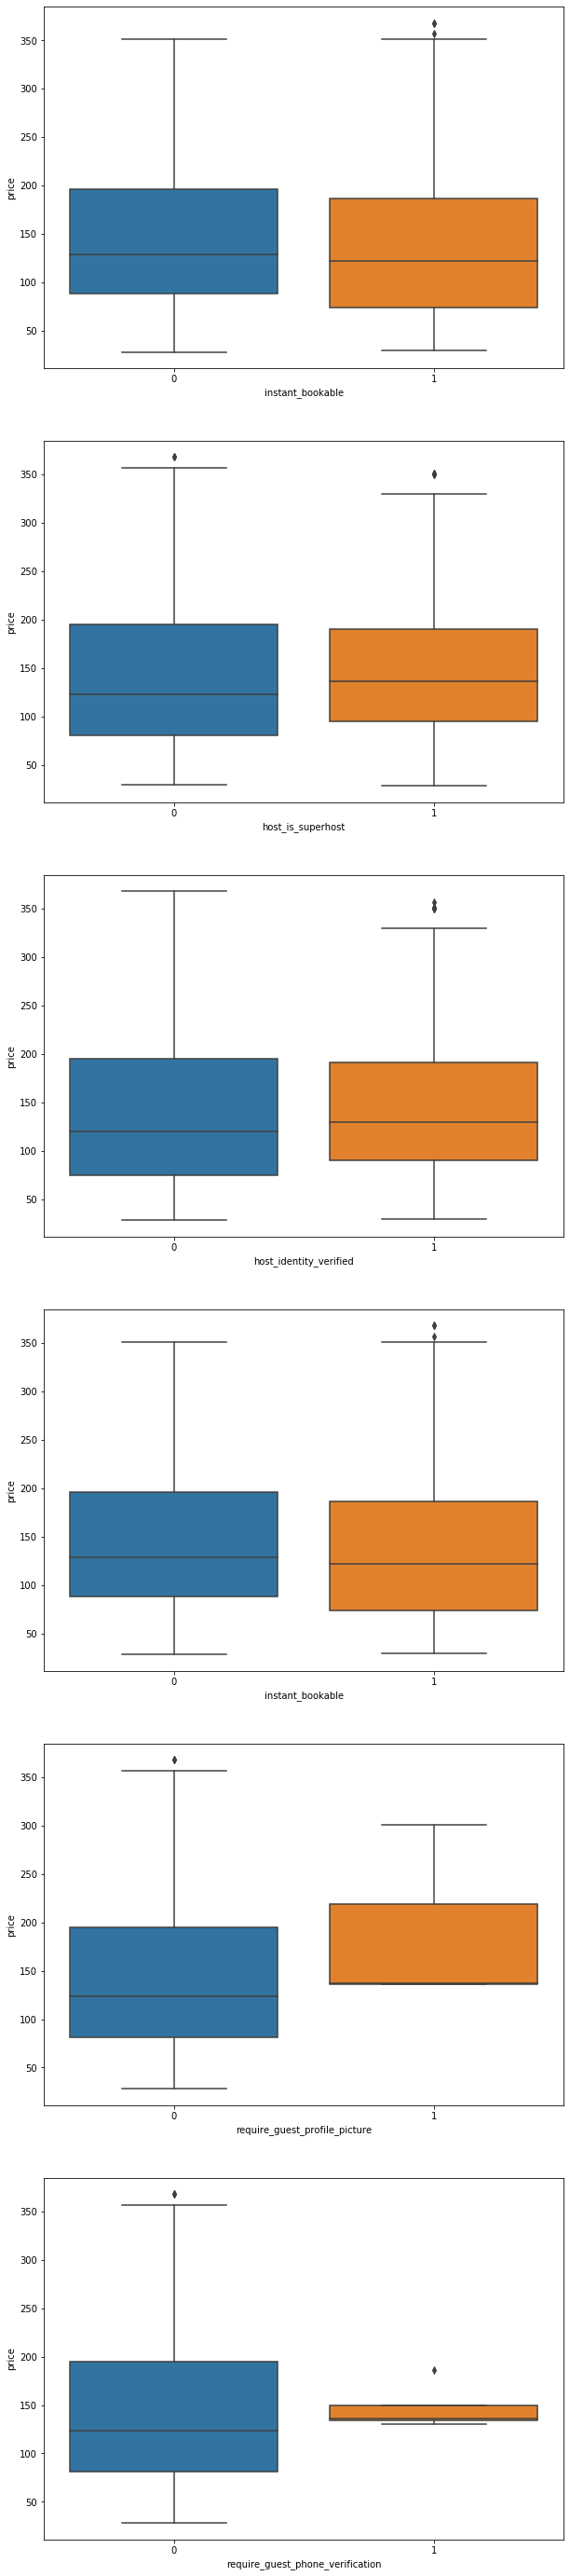

In [146]:
###category true or false 
f, axes = plt.subplots(6,1,figsize=(10,50))
sns.boxplot(x = train_withprice["instant_bookable"], y= train_withprice["price"],ax= axes[0])
sns.boxplot(x = train_withprice["host_is_superhost"], y= train_withprice["price"],ax= axes[1])
sns.boxplot(x = train_withprice["host_identity_verified"], y= train_withprice["price"],ax= axes[2])
sns.boxplot(x = train_withprice["instant_bookable"], y= train_withprice["price"],ax= axes[3])
sns.boxplot(x = train_withprice["require_guest_profile_picture"], y= train_withprice["price"],ax= axes[4])
sns.boxplot(x = train_withprice["require_guest_phone_verification"], y= train_withprice["price"],ax= axes[5])


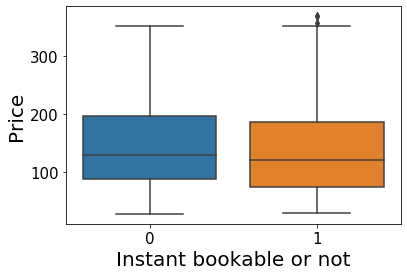

In [160]:

import seaborn as sns

b=sns.boxplot(x = train_withprice["instant_bookable"], y= train_withprice["price"])
b.set_xlabel("Instant bookable or not",fontsize=20)
b.set_ylabel("Price",fontsize=20)
b.tick_params(labelsize=15)

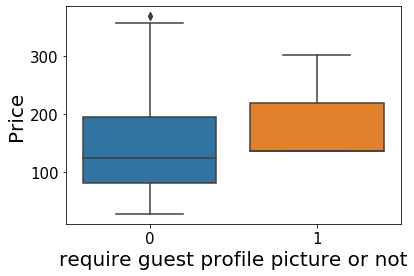

In [159]:
import seaborn as sns

b=sns.boxplot(x = train_withprice["require_guest_profile_picture"], y= train_withprice["price"])
b.set_xlabel("require guest profile picture or not",fontsize=20)
b.set_ylabel("Price",fontsize=20)
b.tick_params(labelsize=15)

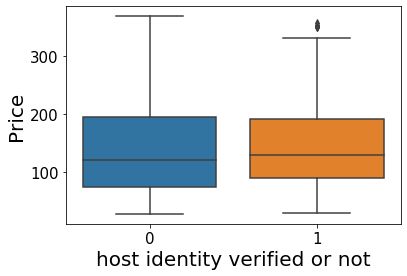

In [158]:
import seaborn as sns

b=sns.boxplot(x = train_withprice["host_identity_verified"], y= train_withprice["price"])
b.set_xlabel("host identity verified or not",fontsize=20)
b.set_ylabel("Price",fontsize=20)
b.tick_params(labelsize=15)


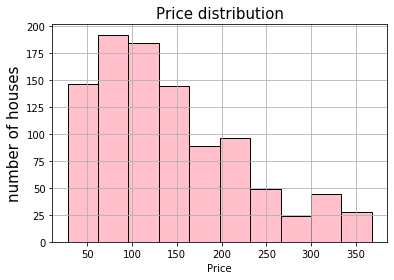

<Figure size 648x432 with 0 Axes>

In [249]:
plt.hist(train_withprice['price'],facecolor='pink',edgecolor='black')
plt.grid()
plt.title('Price distribution',fontsize=15)
plt.ylabel('number of houses',fontsize=15)
plt.xlabel('Price')
plt.figure(figsize = (9,6))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

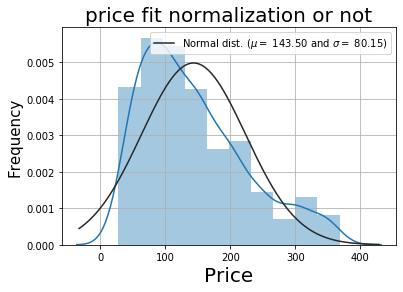

In [244]:
from scipy.stats import norm, skew

sns.distplot(train_withprice['price'],fit=norm, bins=10)
(mu, sigma) = norm.fit(train_withprice['price'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best',fontsize=10)
plt.xlabel('Price',fontsize=20)
plt.ylabel('Frequency',fontsize=15)
plt.grid()
plt.title('price fit normalization or not',fontsize=20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

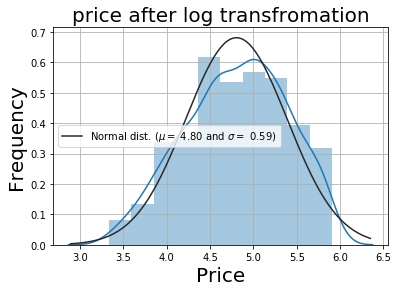

In [243]:
y=train_withprice['price']
y_log = np.log(y)

sns.distplot(y_log,fit=norm, bins=10)
(mu, sigma) = norm.fit(y_log)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best',fontsize=10)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Price',fontsize=20)
plt.title('price after log transfromation',fontsize=20)
plt.grid()
plt.show

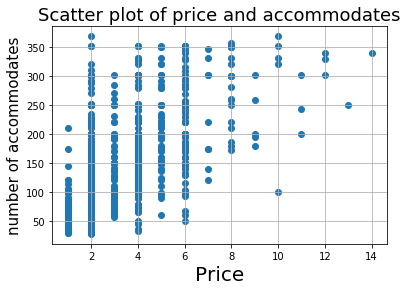

In [254]:
plt.scatter(train_withprice['accommodates'],train_withprice['price'])
plt.grid()
plt.ylabel('number of accommodates',fontsize=15)
plt.xlabel('Price',fontsize=20)
plt.title('Scatter plot of price and accommodates',fontsize=18)
plt.show()

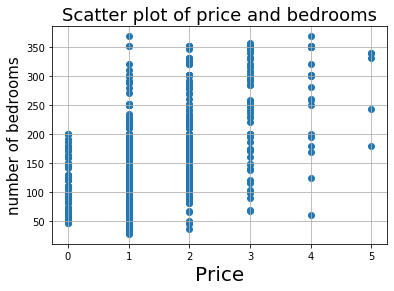

In [255]:
plt.scatter(train_withprice['bedrooms'],train_withprice['price'])
plt.grid()
plt.ylabel('number of bedrooms',fontsize=15)
plt.xlabel('Price',fontsize=20)
plt.title('Scatter plot of price and bedrooms',fontsize=18)
plt.show()

## map  

In [194]:
train["price"].sort_values(axis=0, ascending=False).head(100)

877    368
311    368
894    357
428    351
82     351
      ... 
234    270
991    268
270    260
911    260
537    258
Name: price, Length: 100, dtype: int64

In [195]:
###select top 10%
price_top100=train.query("price >= 258")
price_top100.sort_values(by=["price"])

,Id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
537,1537,258,within an hour,1.00,1.00,f,9,f,-33.871046,151.194061,...,9.0,10.0,10.0,10.0,9.0,t,moderate,f,f,1.26
816,1816,258,NaN,NaN,NaN,f,6,t,-33.906396,151.175248,...,10.0,10.0,10.0,10.0,10.0,t,flexible,f,f,0.07
270,1270,260,NaN,NaN,NaN,f,1,f,-33.799985,151.277143,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
911,1911,260,within a day,0.67,0.00,f,3,t,-33.662430,151.298604,...,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN
991,1991,268,within an hour,1.00,0.99,f,2,f,-33.887778,151.214525,...,10.0,10.0,10.0,10.0,8.0,t,moderate,f,f,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1085,351,within an hour,1.00,1.00,f,0,f,-33.887940,151.269820,...,10.0,10.0,10.0,9.0,10.0,t,strict_14_with_grace_period,f,f,0.97
735,1735,351,NaN,NaN,NaN,f,1,f,-33.878244,151.216540,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
894,1894,357,NaN,NaN,NaN,f,1,t,-33.667815,151.296507,...,NaN,NaN,NaN,NaN,NaN,t,flexible,f,f,NaN
877,1877,368,within a few hours,0.80,1.00,f,2,f,-33.957169,151.143226,...,NaN,NaN,NaN,NaN,NaN,t,strict_14_with_grace_period,f,f,NaN


In [196]:
###slect bottom 10%
price_bottom100=train.query("price <= 55")
price_bottom100.sort_values(by=["price"])

,Id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
113,1113,28,within an hour,1.0,0.96,t,2,f,-33.751120,150.891405,...,9.0,10.0,10.0,10.0,10.0,f,flexible,f,f,2.46
342,1342,29,NaN,NaN,NaN,f,1,f,-33.913437,151.259803,...,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN
385,1385,29,within an hour,1.0,1.00,f,1,f,-33.822567,151.010260,...,9.0,10.0,10.0,10.0,10.0,t,flexible,f,f,3.58
438,1438,29,within an hour,1.0,1.00,f,2,t,-33.896663,151.008240,...,9.0,10.0,10.0,9.0,10.0,f,flexible,f,f,1.27
709,1709,29,within a day,1.0,0.85,f,1,f,-33.842321,150.999225,...,7.0,10.0,9.0,9.0,8.0,t,moderate,f,f,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1300,55,within an hour,1.0,1.00,f,9,f,-33.871438,151.224615,...,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,0.04
742,1742,55,NaN,NaN,NaN,f,1,f,-33.948936,151.029600,...,10.0,10.0,10.0,8.0,10.0,f,flexible,f,f,0.07
303,1303,55,within a few hours,1.0,0.53,f,1,t,-33.902465,151.179710,...,8.0,10.0,10.0,10.0,9.0,f,flexible,f,f,1.43
127,1127,55,within an hour,1.0,0.97,t,3,t,-33.798616,151.010888,...,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,0.61


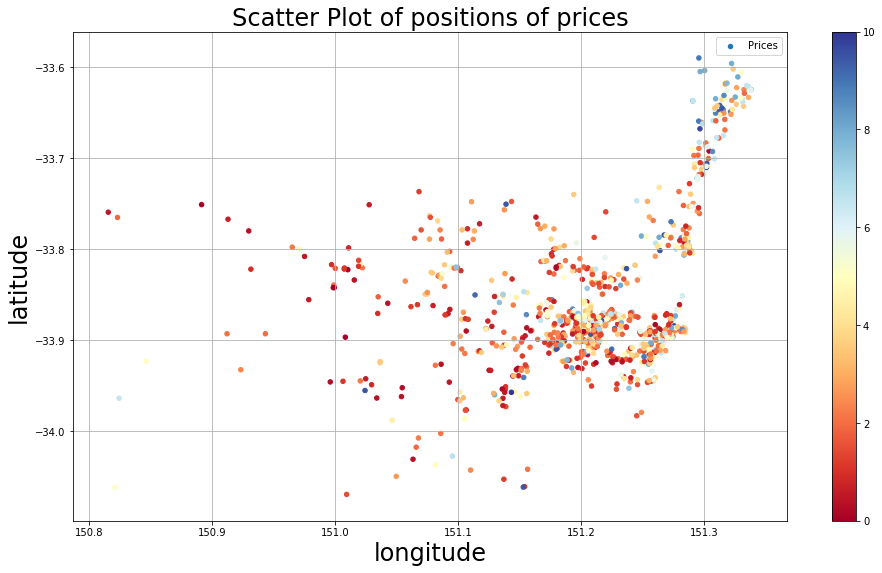

In [197]:
plt.figure(figsize=(16,9))
a=train["price"]
b= 10*(a-a.min())/(a.max()-a.min())
c = plt.scatter(y=train['latitude'],x=train['longitude'], c=b,s=20, cmap='RdYlBu',label="Prices")

plt.xlabel('longitude',fontsize = 24)
plt.ylabel('latitude',fontsize = 24)
plt.title("Scatter Plot of positions of prices",fontsize = 24)
plt.legend()
plt.grid()
plt.colorbar(c)
plt.show()

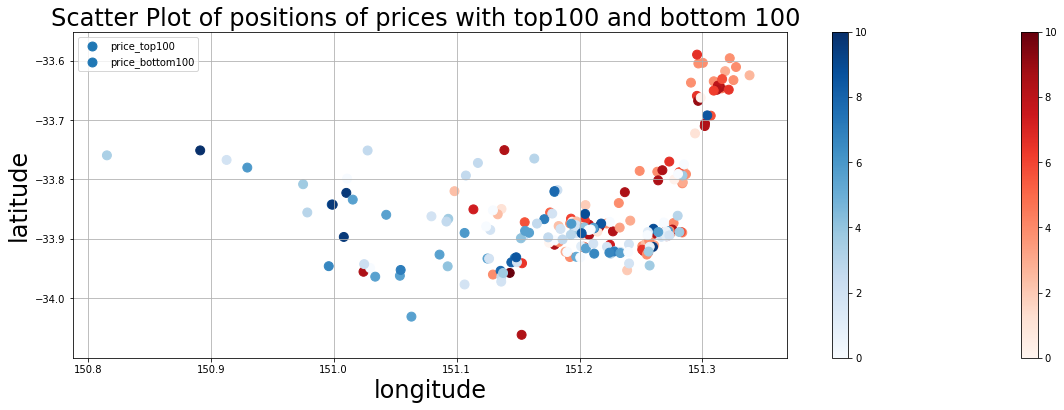

In [198]:
###top100,,,bottom100,,,
plt.figure(figsize=(20,6))
a=price_top100["price"]
k= 10*(a-a.min())/(a.max()-a.min())### more red means much expensive
b= plt.scatter(y=price_top100['latitude'],x=price_top100['longitude'], 
               s=80, c=k,alpha=1,label="price_top100",cmap='Reds')

c=price_bottom100["price"]
g=10*(c.max()-c)/(c.max()-c.min())##more blue means much cheaper
d= plt.scatter(y=price_bottom100['latitude'],x=price_bottom100['longitude'], 
               s=80,c=g,alpha=1,label="price_bottom100",cmap='Blues')

plt.xlabel('longitude',fontsize = 24)
plt.ylabel('latitude',fontsize = 24)
plt.title("Scatter Plot of positions of prices with top100 and bottom 100 ",fontsize = 24)
plt.legend()
plt.colorbar(b)
plt.colorbar(d)
plt.grid()
plt.show()

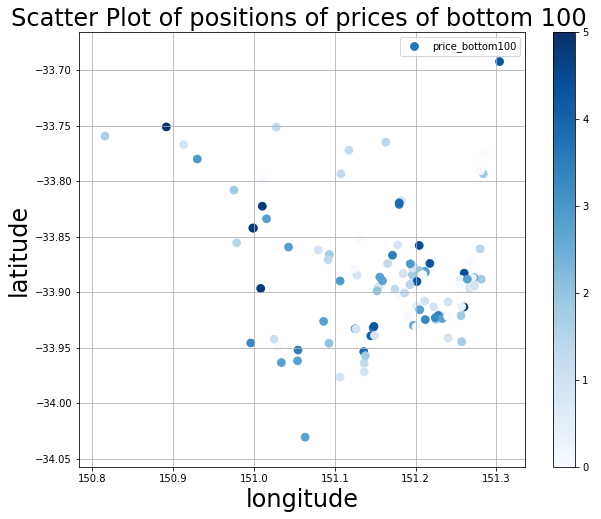

In [199]:
###bottom
plt.figure(figsize=(10,8))
c=price_bottom100["price"]
g=5*(c.max()-c)/(c.max()-c.min())## 
d= plt.scatter(y=price_bottom100['latitude'],x=price_bottom100['longitude'], 
               s=60,c=g,alpha=1,label="price_bottom100",cmap='Blues')


plt.xlabel('longitude',fontsize = 24)
plt.ylabel('latitude',fontsize = 24)
plt.title("Scatter Plot of positions of prices of bottom 100 ",fontsize = 24)
plt.legend()
plt.grid()
plt.colorbar(d)
plt.show()

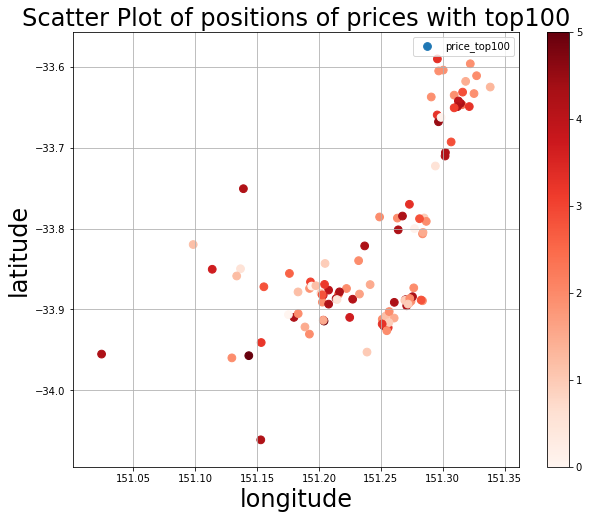

In [200]:
##top
plt.figure(figsize=(10,8))
a=price_top100["price"]
k=5*(a-a.min())/(a.max()-a.min())#
b= plt.scatter(y= price_top100['latitude'],x=price_top100['longitude'], 
               s=60, c=k,alpha=1,label="price_top100",cmap='Reds')

plt.xlabel('longitude',fontsize = 24)
plt.ylabel('latitude',fontsize = 24)
plt.title("Scatter Plot of positions of prices with top100",fontsize = 24)
plt.colorbar(b)
plt.grid()
plt.legend()
plt.show()

## hot map

In [201]:
###hot map
corr= train_withprice.corr()["price"].sort_values()
corr

room_type_Private room        -0.533321
cancellation_policy           -0.200818
room_type_Shared room         -0.187491
host_response_time_No Infor   -0.106095
host_acceptance_rate          -0.092410
                                 ...   
beds                           0.497699
bedrooms                       0.571026
room_type_Entire home/apt      0.581429
accommodates                   0.613735
price                          1.000000
Name: price, Length: 82, dtype: float64

In [202]:
corr.shape

(82,)

In [203]:
#train_withprice_corr= train_withprice[corr.loc[(corr > 0.09)|(corr< -0.08)].index]
#plt.subplots(figsize=(20,15))
#sns.heatmap(train_withprice_corr.corr(), square=True, annot= True, cmap="RdGy")
#plt.title("relationships")

In [204]:
#x_train=train_withprice.drop(["price","index","Id",], axis=1)
#y_train=train_withprice["price"]
#x_test=test_fe_dm.drop(["index","Id",], axis=1)

In [205]:
train_withprice.isna().sum().sort_values()

index                                  0
review_scores_cleanliness_Good         0
review_scores_cleanliness_Fair         0
review_scores_cleanliness_Excellent    0
review_scores_accuracy_Poor            0
                                      ..
reviews_per_month                      0
require_guest_phone_verification       0
require_guest_profile_picture          0
instant_bookable                       0
price                                  0
Length: 82, dtype: int64

# outlier

In [206]:
print(train_withprice.shape)
train_withprice = train_withprice[-(train_withprice["extra_people"]>=300)|
                                    (train_withprice["host_listings_count"]>=260)|
                                    (train_withprice["security_deposit"]>=7000)|
                                    (train_withprice["minimum_nights"]>=1000)]
print(train_withprice.shape)

(998, 82)
(996, 82)


In [207]:
train_withprice.isna().sum().sort_values()

index                                  0
review_scores_cleanliness_Good         0
review_scores_cleanliness_Fair         0
review_scores_cleanliness_Excellent    0
review_scores_accuracy_Poor            0
                                      ..
reviews_per_month                      0
require_guest_phone_verification       0
require_guest_profile_picture          0
instant_bookable                       0
price                                  0
Length: 82, dtype: int64

# last step before enter modeling

In [208]:


x_train=train_withprice.drop(["price","index","Id",], axis=1)
y_train=train_withprice["price"]
x_test=test_fe_dm.drop(["index","Id",], axis=1)

In [209]:
x_train.shape

(996, 79)

In [210]:
y = train['price']
y.describe()

count    1000.000000
mean      143.630000
std        80.277865
min        28.000000
25%        81.000000
50%       124.000000
75%       195.000000
max       368.000000
Name: price, dtype: float64

In [211]:
len(y_train)

996

# building model

###### As the EDA shows previously,some feature is not looked like normal dist. For better modeling especially for linear moedl, we do the data process again which is dealing with some feature has skew.

In [212]:
log_train = train_withprice.copy()
log_test = test_fe_dm.copy()

In [213]:
#log_train['price'] = log_train['price'].astype(float) 
#log_train['cancellation_policy'] = log_train['cancellation_policy'].astype(float)

In [214]:
continuous=[]
dummys=[]

for x in train_withprice.columns[2:]:
    if train_withprice[x].value_counts().shape[0] > 2:
        continuous.append(x)
    else:
        dummys.append(x)
        
print("conti_var:{0}".format(continuous))

print("********")

print("dummy_var:{0}".format(dummys))

conti_var:['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'cancellation_policy', 'reviews_per_month', 'postcode', 'price']
********
dummy_var:['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_response_time_No Infor', 'host_response_time_a few days or more', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour', 'property_type_Apartment', 'property_type_Condominium', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_House', 'property_type_Other', 'property_type_Townhouse', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'bed_type_Airbed', 'be

In [215]:
check_skew=log_train.describe()
check_skew.loc["skew",:]=log_train.skew()
check_skew.loc['kurt',:]=log_train.kurt()
check_skew=check_skew[continuous].T
check_skew

,count,mean,std,min,25%,50%,75%,max,skew,kurt
host_response_rate,996.0,0.960612,0.155770,0.000000,1.000000,1.000000,1.000000,1.000000,-5.005581,26.005930
host_acceptance_rate,996.0,0.869357,0.250404,0.000000,0.917500,0.970000,0.990000,1.000000,-2.515465,5.407684
host_listings_count,996.0,6.497992,20.857810,0.000000,1.000000,1.000000,2.000000,260.000000,6.918870,61.487847
latitude,996.0,-33.858492,0.080059,-34.069336,-33.901721,-33.882019,-33.826688,-33.590054,1.235595,1.809573
longitude,996.0,151.206773,0.078152,150.815504,151.179661,151.212697,151.261191,151.338333,-1.427301,3.444269
accommodates,996.0,3.155622,1.920238,1.000000,2.000000,2.000000,4.000000,14.000000,1.639939,3.767010
bathrooms,996.0,1.242972,0.489796,0.000000,1.000000,1.000000,1.000000,5.000000,2.163788,6.341405
bedrooms,996.0,1.415663,0.843489,0.000000,1.000000,1.000000,2.000000,5.000000,1.237933,2.227991
beds,996.0,1.811245,1.324115,0.000000,1.000000,1.000000,2.000000,13.000000,2.650657,11.877749
security_deposit,996.0,273.900602,388.770782,0.000000,195.000000,195.000000,300.000000,7000.000000,9.444106,133.866914


###### it is obvious that there are positive skew, eg.latitude, which may influence the preformance of linear model

In [216]:
#Before log transformation, ensuring all data is bigger than 0
#After checking, only "latitude" is has negatiive value

log_train['latitude'] = log_train['latitude'].apply(lambda x: -x if x < 0 else x)
log_test['latitude'] = log_test['latitude'].apply(lambda x: -x if x < 0 else x)





In [217]:
#locating the skew features.

positive_skewd = check_skew.loc[check_skew['skew']>0].index
positive_skewd.tolist()

['host_listings_count',
 'latitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'price']

In [218]:
#impletementing the log transfer to those feature

for i in positive_skewd[:-1]:
    log_train[i] = np.log(log_train[i]+1)
    log_test[i] = np.log(log_test[i]+1)
    

In [219]:
log_train['price'] = np.log(log_train['price'])

In [220]:
#define X,y

x_train_log = log_train.drop(['price','Id','index'],axis=1)
y_train_log = log_train['price']
x_test_log = log_test.drop(['Id','index'],axis=1)

###### normalise data

In [221]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_log_std = scaler.fit_transform(x_train_log)
X_test_scaled_std = scaler.transform(x_test_log)

In [222]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_log_MM = scaler.fit_transform(x_train_log)
X_test_log_MM = scaler.transform(x_test_log)


## OLS---------Banchmark Model

In [223]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression(fit_intercept = True)
ols.fit(x_train_log_MM, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

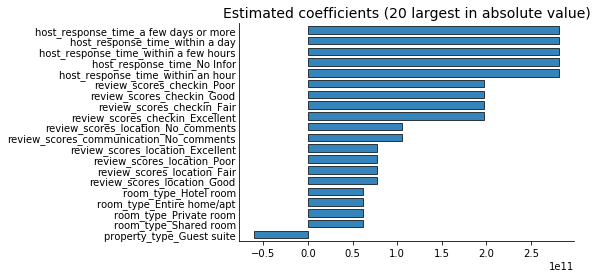

In [224]:
from statlearning import plot_coefficients
plot_coefficients(ols, x_train_log.columns) 
plt.show()

## Subset Selection (Forward selection)

In [225]:
%%time
from statlearning import forward

fwd = forward()
fwd.fit(np.array(x_train_log_MM), np.array(y_train_log))

len(fwd.subset)

CPU times: user 15.3 s, sys: 118 ms, total: 15.4 s
Wall time: 3.88 s


27

## Ridge Regression

In [226]:
from sklearn.linear_model import RidgeCV

#alpha = list(np.logspace(-15, 15, 151, base=2))
a = np.logspace(-15, 15, 151, base=2)
alphas = a.tolist()

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(x_train_log_MM, y_train_log)

RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

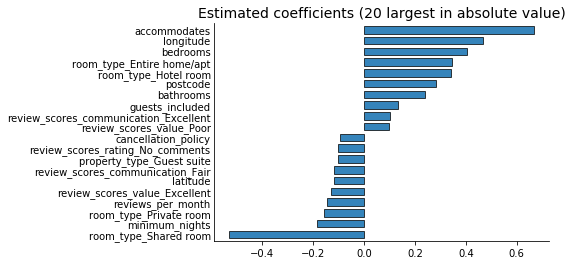

In [227]:
plot_coefficients(ridge, x_train_log.columns) 
plt.show()

## Lasso Regression

In [228]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(x_train_log_MM, y_train_log)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

###### Calculate how many feature still in model

In [229]:
len(x_train_log.columns) - np.sum(lasso.coef_==0.0)

53

In [230]:
lasso_coef = pd.DataFrame(np.c_[x_train_log.columns,lasso.coef_], columns=['features','coef'])
lasso_coef

,features,coef
0,host_response_rate,-0
1,host_acceptance_rate,-0.0397687
2,host_is_superhost,0.0638408
3,host_listings_count,0.0542961
4,host_identity_verified,0.0118604
...,...,...
74,review_scores_value_Excellent,-0.141202
75,review_scores_value_Fair,0
76,review_scores_value_Good,-0.07407
77,review_scores_value_No_comments,1.88721e-05


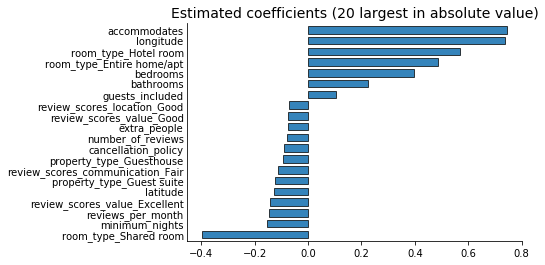

In [231]:
plot_coefficients(lasso, x_train_log.columns) 
plt.show()

## Elastic Net

In [232]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(x_train_log_MM, y_train_log)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [233]:
enet.l1_ratio_

0.99

In [234]:
len(x_train_log.columns) - np.sum(enet.coef_==0.0)

54

In [235]:
enet_coef = pd.DataFrame(np.c_[x_train_log.columns,enet.coef_], columns=['features','coef'])
enet_coef

,features,coef
0,host_response_rate,-0
1,host_acceptance_rate,-0.0398025
2,host_is_superhost,0.0638176
3,host_listings_count,0.054294
4,host_identity_verified,0.0118612
...,...,...
74,review_scores_value_Excellent,-0.141141
75,review_scores_value_Fair,0
76,review_scores_value_Good,-0.0740197
77,review_scores_value_No_comments,3.29663e-05


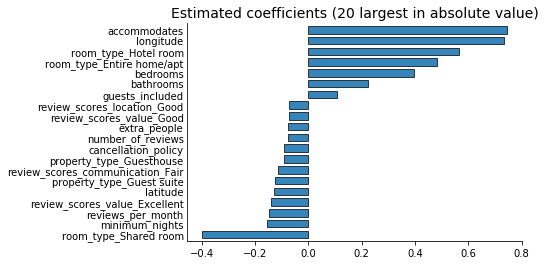

In [236]:
plot_coefficients(enet, x_train_log.columns) 
plt.show()

### bagging

In [238]:
%%time
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(n_estimators=1000, random_state=1)
bag.fit(x_train_log, y_train_log)

CPU times: user 7.88 s, sys: 69.8 ms, total: 7.95 s
Wall time: 7.98 s


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=1000,
                 n_jobs=None, oob_score=False, random_state=1, verbose=0,
                 warm_start=False)

In [239]:
from sklearn.ensemble import RandomForestRegressor

### Random Forest Regression

In [240]:
from sklearn.model_selection import RandomizedSearchCV

In [256]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

tuning_parameters = {
    'n_estimators': [250, 500, 750, 1000, 1500],
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_features': np.arange(1, x_train_log.shape[1]),
}

rf_search = RandomizedSearchCV(rf, tuning_parameters, cv = 5, n_iter= 16, return_train_score=False, n_jobs=4,
                              random_state = 20)
rf_search.fit(x_train_log, y_train_log)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 750, 'min_samples_leaf': 1, 'max_features': 23} 

CPU times: user 2.61 s, sys: 105 ms, total: 2.72 s
Wall time: 1min 2s


## Model Stacking

In [261]:
!pip install mlxtend

In [262]:
from mlxtend.regressor import StackingCVRegressor

In [263]:
%%time

models = [rf,lasso, bag]

stackla = StackingCVRegressor(models, meta_regressor = lasso, cv = 5)
stackla.fit(x_train_log.as_matrix(), y_train_log.as_matrix())

stacklinear = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv = 5)
stacklinear.fit(x_train_log.as_matrix(), y_train_log.as_matrix())



CPU times: user 1min 51s, sys: 1.28 s, total: 1min 52s
Wall time: 1min 47s


StackingCVRegressor(cv=5,
                    meta_regressor=LinearRegression(copy_X=True,
                                                    fit_intercept=True,
                                                    n_jobs=None,
                                                    normalize=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=[RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=23,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      mi...
                

In [264]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

methods=['ols', 'lasso', 'ridge', 'enet', 'bag','rf', 'stacklinear',"stackla"]
results = []

for i in methods:
    if i in ['ols', 'lasso', 'ridge', 'enet']:
        predicted = cross_val_predict(eval(i), x_train_log_MM, y_train_log, cv=5)
        result = np.sqrt(mean_squared_error(np.exp(y_train_log), np.exp(predicted)))
        results.append(result)
    else:
        predicted = cross_val_predict(eval(i), x_train_log.as_matrix(), y_train_log.as_matrix(), cv=5)
        result = np.sqrt(mean_squared_error(np.exp(y_train_log), np.exp(predicted)))
        results.append(result)
        
results_df = pd.DataFrame(results, index = methods,columns = ['RMSE'])


CPU times: user 9min 7s, sys: 5.25 s, total: 9min 13s
Wall time: 7min 57s


In [265]:
results_df

,RMSE
ols,55.283443
lasso,54.367889
ridge,54.723039
enet,54.458151
bag,53.337639
rf,52.609000
stacklinear,52.676896
stackla,52.490188


# Submission

In [ ]:
y_pred = stack.predict(x_test_log.as_matrix())

submission = pd.DataFrame(np.c_[test.index, np.exp(y_pred)], 
                          columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle012_submission_Group_2.csv',  index=False)